In [1]:
import HMcode2020Emu as hmcodeemu
import matplotlib.pyplot as plt
import numpy as np

2024-07-12 11:33:32.088088: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-12 11:33:32.314941: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-12 11:33:32.576328: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-12 11:33:32.577864: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-12 11:33:34.133035: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

/home/mtsedrik/HMcode2020Emu/HMcode2020Emu

 As it is the first instance of the emulator, we need to download some data, it can take a few seconds...




Downloading...
From: https://drive.google.com/uc?id=1Bmr4UpA69RTt15Vbu69I7D7ghUUEVSMP
To: /home/mtsedrik/HMcode2020Emu/HMcode2020Emu/models_v3.zip
100%|████████████████████████████████████████████████████████████| 25.3M/25.3M [00:00<00:00, 57.9MB/s]


Download finished. Extracting files.
Done.



## Parameter ranges
| parameter         | limits                |
| :---:             | :---:                 |
| omega_cdm         | [0.1, 0.8]            |
| omega_baryon      | [0.01, 0.1]           |
| hubble            | [0.4, 1.]             |
| As                | [0.495e-9, 5.459e-9]  |
| ns                | [0.6, 1.2]            |
| neutrino_mass [eV]| [0., 0.5]             |
| w0                | [-3., -0.3]           |
| wa                | [-3., 3.]             |
| log10TAGN         | [7.6, 8.3]            |
| z                 | [0.0, 4.]             |
| k_lin [h/Mpc]     | [3.7e-4, 50]          |
| k_nonlin [h/Mpc]  | [0.01, 50]            |
with $w_0+w_a \leq 0$

## Linear CAMB versus non-linear HMcode2020

In [2]:
params = {
    'omega_cdm'     :  [0.315, 0.315],
    'As'            :  [np.exp(3.07)*1.e-10, np.exp(3.07)*1.e-10],
    'omega_baryon'  :  [0.05, 0.05],
    'ns'            :  [0.96, 0.96],
    'hubble'        :  [0.67, 0.67],
    'neutrino_mass' :  [0.0, 0.0],
    'w0'            :  [-1.0, -1.],
    'wa'            :  [0.0, 0.0],
    'z'             :  [0., 1.]
}
emulator = hmcodeemu.Matter_powerspectrum()
k_lin, pk_lin_total = emulator.get_linear_pk(**params)
k_nonlin, pk_nonlin_total = emulator.get_nonlinear_pk(**params)

Loading linear emulator...
Linear emulator loaded in memory.
Loading nonlinear emulator...
Non-linear emulator loaded in memory.
Loading linear emulator...
Baryonic boost emulator loaded in memory.
Loading sigma8 emulator...
Linear emulator loaded in memory.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


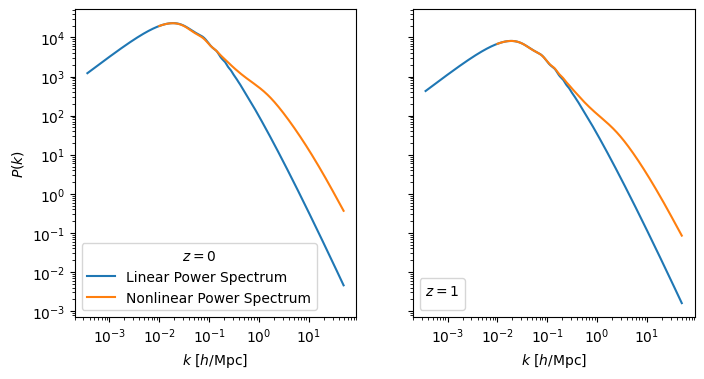

In [3]:
fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True)
ax[0].loglog(k_lin, pk_lin_total[0], label="Linear Power Spectrum")
ax[0].loglog(k_nonlin, pk_nonlin_total[0], label="Nonlinear Power Spectrum")
ax[1].loglog(k_lin, pk_lin_total[1])
ax[1].loglog(k_nonlin, pk_nonlin_total[1])
ax[0].set_xlabel("$k$ [$h$/Mpc]");ax[1].set_xlabel("$k$ [$h$/Mpc]")
ax[0].set_ylabel("$P(k)$")
ax[0].legend(title='$z=0$', loc='lower left')
ax[1].legend(title='$z=1$', loc='lower left')

## Baryonic Feedback
We also show how you can specify a $k$-range for the linear, nonlinear and baryonic boost functions.

In [6]:
params['log10TAGN']=[7.8, 8.0]
params['z']=[0., 0.]
kh_hmcode_test = np.logspace(np.log10(0.01), np.log10(30), 126)
k_nonlin_new, pk_nonlin_total_bar = emulator.get_nonlinear_pk(**params, baryonic_boost=True, k=kh_hmcode_test)
k_nonlin_new, pk_nonlin_total = emulator.get_nonlinear_pk(**params, baryonic_boost=False, k=kh_hmcode_test)

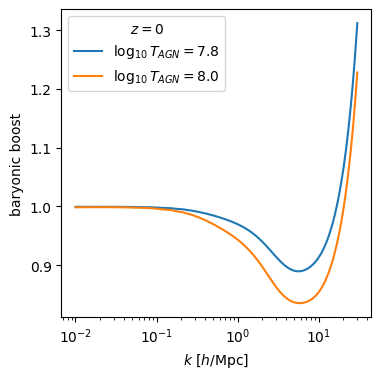

In [7]:
fig, ax = plt.subplots(figsize=(4,4), sharey=True)
ax.semilogx(k_nonlin_new, pk_nonlin_total_bar[0]/pk_nonlin_total[0], label="$\log_{10}{T_{AGN}}=7.8$")
ax.semilogx(k_nonlin_new, pk_nonlin_total_bar[1]/pk_nonlin_total[0], label="$\log_{10}{T_{AGN}}=8.0$")
ax.set_xlabel("$k$ [$h$/Mpc]")
ax.set_ylabel("baryonic boost")
ax.legend(title='$z=0$', loc='upper left')

## Extended cosmologies: massive neutrinos and dark energy
Note that for neutrino calculations we assume 2 massless neutrinos and 1 massive neutrino with the mass equal to 'neutrino_mass'.
There are 2 options for the default power spectrum: the total power spectrum ```nonu=False``` (analogous to ```cold=False``` in bacco-emulator)
$$\Delta_{tot}=\frac{\rho_{cdm}\Delta_{cdm}+\rho_b \Delta_b +\rho_\nu \Delta_\nu}{\rho_{cdm}+\rho_b +\rho_\nu}$$
and the cold dark matter + baryons power spectrum with ```nonu=True``` (analogous to ```cold=True``` in bacco-emulator)
$$\Delta_{nonu}=\frac{\rho_{cdm}\Delta_{cdm}+\rho_b \Delta_b }{\rho_{cdm}+\rho_b }\, .$$

In [10]:
params['z']=[0., 0.]
params['neutrino_mass']=[0.06, 0.1]
k_nonlin_new, pk_nonlin_total_nu = emulator.get_nonlinear_pk(**params, k=kh_hmcode_test)

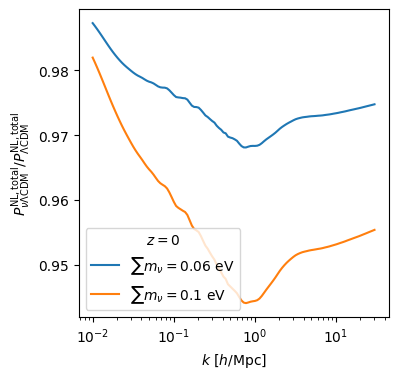

In [13]:
fig, ax = plt.subplots(figsize=(4,4), sharey=True)
ax.semilogx(k_nonlin_new, pk_nonlin_total_nu[0]/pk_nonlin_total[0], label="$\sum m_\\nu=0.06$ eV")
ax.semilogx(k_nonlin_new, pk_nonlin_total_nu[1]/pk_nonlin_total[0], label="$\sum m_\\nu=0.1$ eV")
ax.set_xlabel("$k$ [$h$/Mpc]")
ax.set_ylabel("$P^{\\rm NL, total}_{\\nu \Lambda \\rm CDM}/P^{\\rm NL, total}_{\Lambda \\rm CDM}$")
ax.legend(title='$z=0$', loc='lower left')

In [14]:
params['z']=[0., 0.]
params['neutrino_mass']=[0., 0.0]
params['w0']=[-1.2, -0.8]
params['wa']=[0.0, 0.0]
k_nonlin_new, pk_nonlin_total_w = emulator.get_nonlinear_pk(**params, k=kh_hmcode_test)
params['wa']=[1., -1.]
k_nonlin_new, pk_nonlin_total_w0wa = emulator.get_nonlinear_pk(**params, k=kh_hmcode_test)

In [17]:
zbins=50
zz=np.logspace(-3, np.log10(4.), zbins)
params_z = {
    'omega_cdm'     :  0.315*np.ones(zbins),
    'As'            :  np.exp(3.07)*1.e-10*np.ones(zbins),
    'omega_baryon'  :  0.05*np.ones(zbins),
    'ns'            :  0.96*np.ones(zbins),
    'hubble'        :  0.67*np.ones(zbins),
    'neutrino_mass' :  0.0*np.ones(zbins),
    'w0'            :  -1.0*np.ones(zbins),
    'wa'            :  0.0*np.ones(zbins),
    'z'             :  zz
}
sigma8, fsigma8 = emulator.get_sigma8(**params_z)
params_z['w0']=-1.2*np.ones(zbins)
sigma8_w0, fsigma8_w0 = emulator.get_sigma8(**params_z)
params_z['wa']=np.ones(zbins)
sigma8_w0wa, fsigma8_w0wa = emulator.get_sigma8(**params_z)

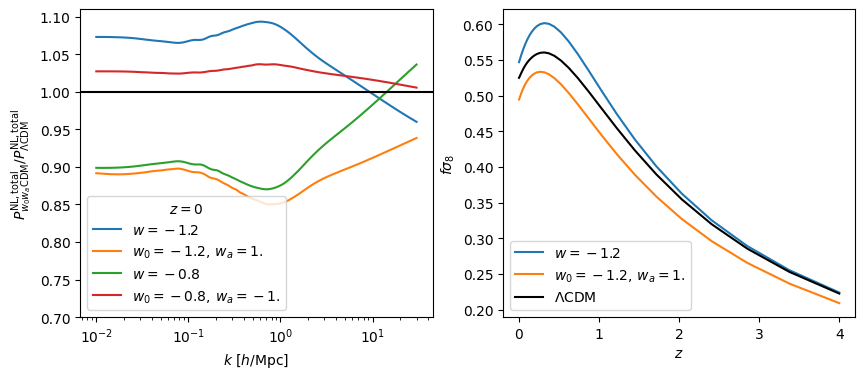

In [18]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].semilogx(k_nonlin_new, pk_nonlin_total_w[0]/pk_nonlin_total[0], label="$w=-1.2$")
ax[0].semilogx(k_nonlin_new, pk_nonlin_total_w0wa[0]/pk_nonlin_total[0], label="$w_0=-1.2, \, w_a=1.$")
ax[0].semilogx(k_nonlin_new, pk_nonlin_total_w[1]/pk_nonlin_total[0], label="$w=-0.8$")
ax[0].semilogx(k_nonlin_new, pk_nonlin_total_w0wa[1]/pk_nonlin_total[0], label="$w_0=-0.8, \, w_a=-1.$")
ax[0].axhline(y=1., color='k')

ax[1].plot(zz, fsigma8_w0, label="$w=-1.2$")
ax[1].plot(zz, fsigma8_w0wa, label="$w_0=-1.2, \, w_a=1.$")
ax[1].plot(zz, fsigma8, color='k', label="$\Lambda$CDM")

ax[0].set_xlabel("$k$ [$h$/Mpc]");ax[1].set_xlabel("$z$")
ax[0].set_ylabel("$P^{\\rm NL, total}_{w_0w_a\\rm CDM}/P^{\\rm NL, total}_{\Lambda \\rm CDM}$")
ax[1].set_ylabel("$f\sigma_8$")
ax[0].set_ylim(0.7, 1.11)
ax[0].legend(title='$z=0$', loc='lower left')
ax[1].legend(loc='lower left')